In [154]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [155]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats



In [156]:

df=pd.read_csv(r"D:/test/data/data/train.csv")
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [157]:
df.isnull().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [158]:
df.drop(columns="New_Price",inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [159]:
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl")
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")
df["Engine"] = df["Engine"].str.rstrip(" CC")
df["Power"] = df["Power"].str.rstrip(" bhp")
df["Power"]= df["Power"].replace(regex="null", value = np.nan)
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")
df["Owner_Type"]=df["Owner_Type"].replace(regex="First", value = 1)
df["Owner_Type"]=df["Owner_Type"].replace(regex="Second", value = 2)
df["Owner_Type"]=df["Owner_Type"].replace(regex="Third", value = 3)
df["Owner_Type"]=df["Owner_Type"].replace(regex="Fourth & Above", value = 4)
df["Owner_Type"]=df["Owner_Type"].astype("int")
df["Mileage"]=df["Mileage"].astype("float")
df["Power"]=df["Power"].astype("float")
df["Engine"]=df["Engine"].astype("float")
df["Engine"]=df["Engine"].astype("float")
df['Price'] = df['Price'].mul(100000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   int32   
 7   Mileage            6017 non-null   float64 
 8   Engine             5983 non-null   float64 
 9   Power              5876 non-null   float64 
 10  Seats              5977 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(2), float64(5), int32(1), int64(2), object(2)
memory usage: 458.9+ KB


In [160]:
new_data=df.dropna(axis=0)
new_data.count()

Name                 5872
Location             5872
Year                 5872
Kilometers_Driven    5872
Fuel_Type            5872
Transmission         5872
Owner_Type           5872
Mileage              5872
Engine               5872
Power                5872
Seats                5872
Price                5872
dtype: int64

In [161]:
new_data["Current_Year"]=2022
new_data["Age_of_car"]=new_data["Current_Year"]-new_data["Year"]
new_data.drop("Current_Year",axis=1,inplace=True)
new_data["Company"]=new_data["Name"].str.split(" ").str[0]
new_data["Model"]=new_data["Name"].str.split(" ").str[1]+new_data["Name"].str.split(" ").str[2]
new_data


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,175000.0,12,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,1250000.0,7,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,450000.0,11,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,600000.0,10,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,1774000.0,9,Audi,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,28.40,1248.0,74.00,5.0,475000.0,8,Maruti,SwiftVDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,24.40,1120.0,71.00,5.0,400000.0,7,Hyundai,Xcent1.1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,290000.0,10,Mahindra,XyloD4
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.90,998.0,67.10,5.0,265000.0,9,Maruti,WagonR


C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\385524717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = new_data.corr()


<AxesSubplot: >

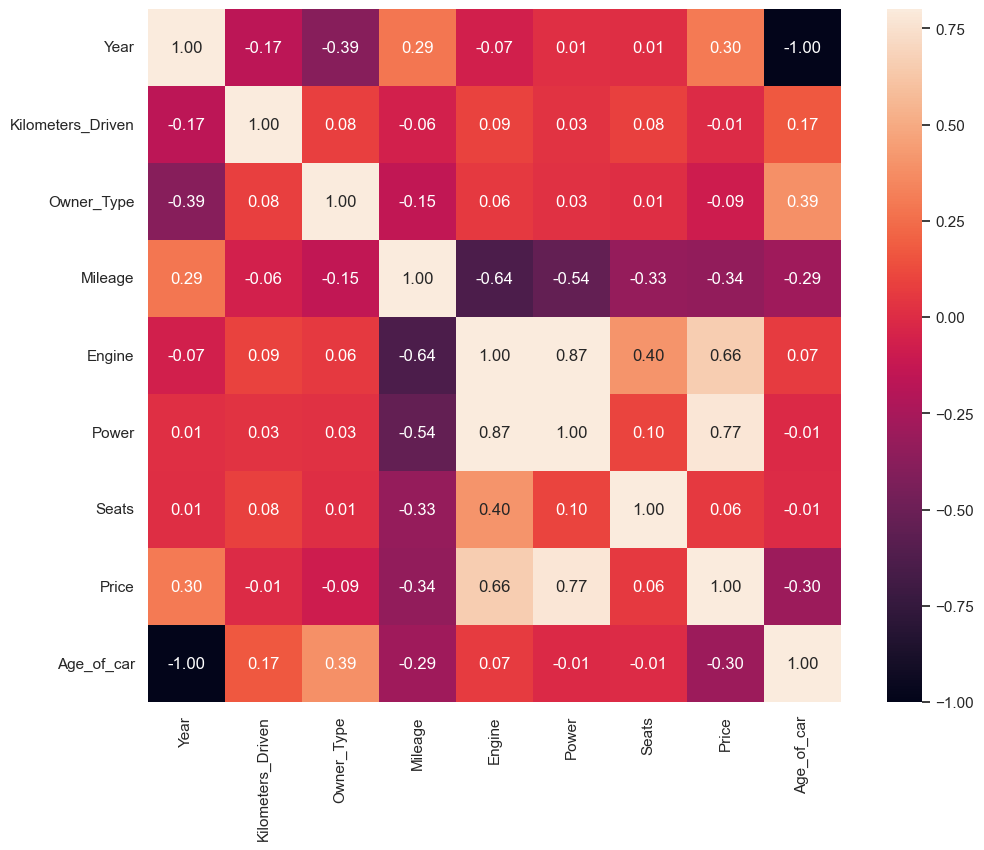

In [162]:
hm = new_data.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(hm,vmax=.8, square=True, annot=True, fmt='.2f')

In [163]:
new_data['Price'].describe()

count    5.872000e+03
mean     9.603919e+05
std      1.124945e+06
min      4.400000e+04
25%      3.517500e+05
50%      5.750000e+05
75%      1.000000e+06
max      1.600000e+07
Name: Price, dtype: float64

C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\2477549237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

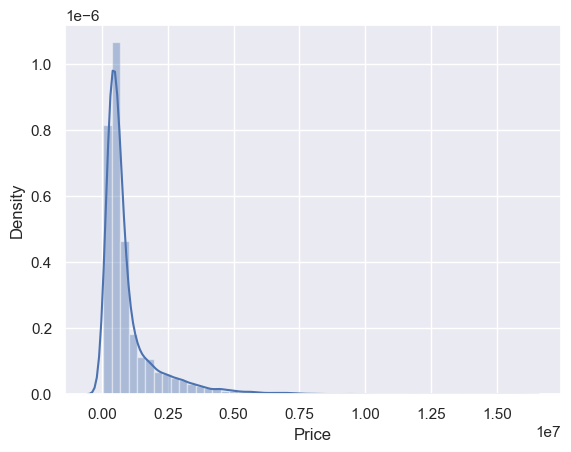

In [164]:
sns.distplot(new_data['Price'])

<AxesSubplot: xlabel='Power', ylabel='Price'>

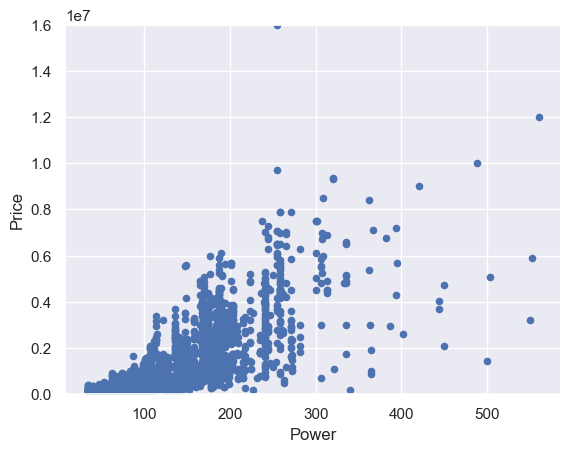

In [165]:
data = pd.concat([new_data['Price'], new_data['Power']],axis=1)
data.plot.scatter(x = 'Power', y = 'Price', ylim=(0,16000000))


c:\Users\sherwin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


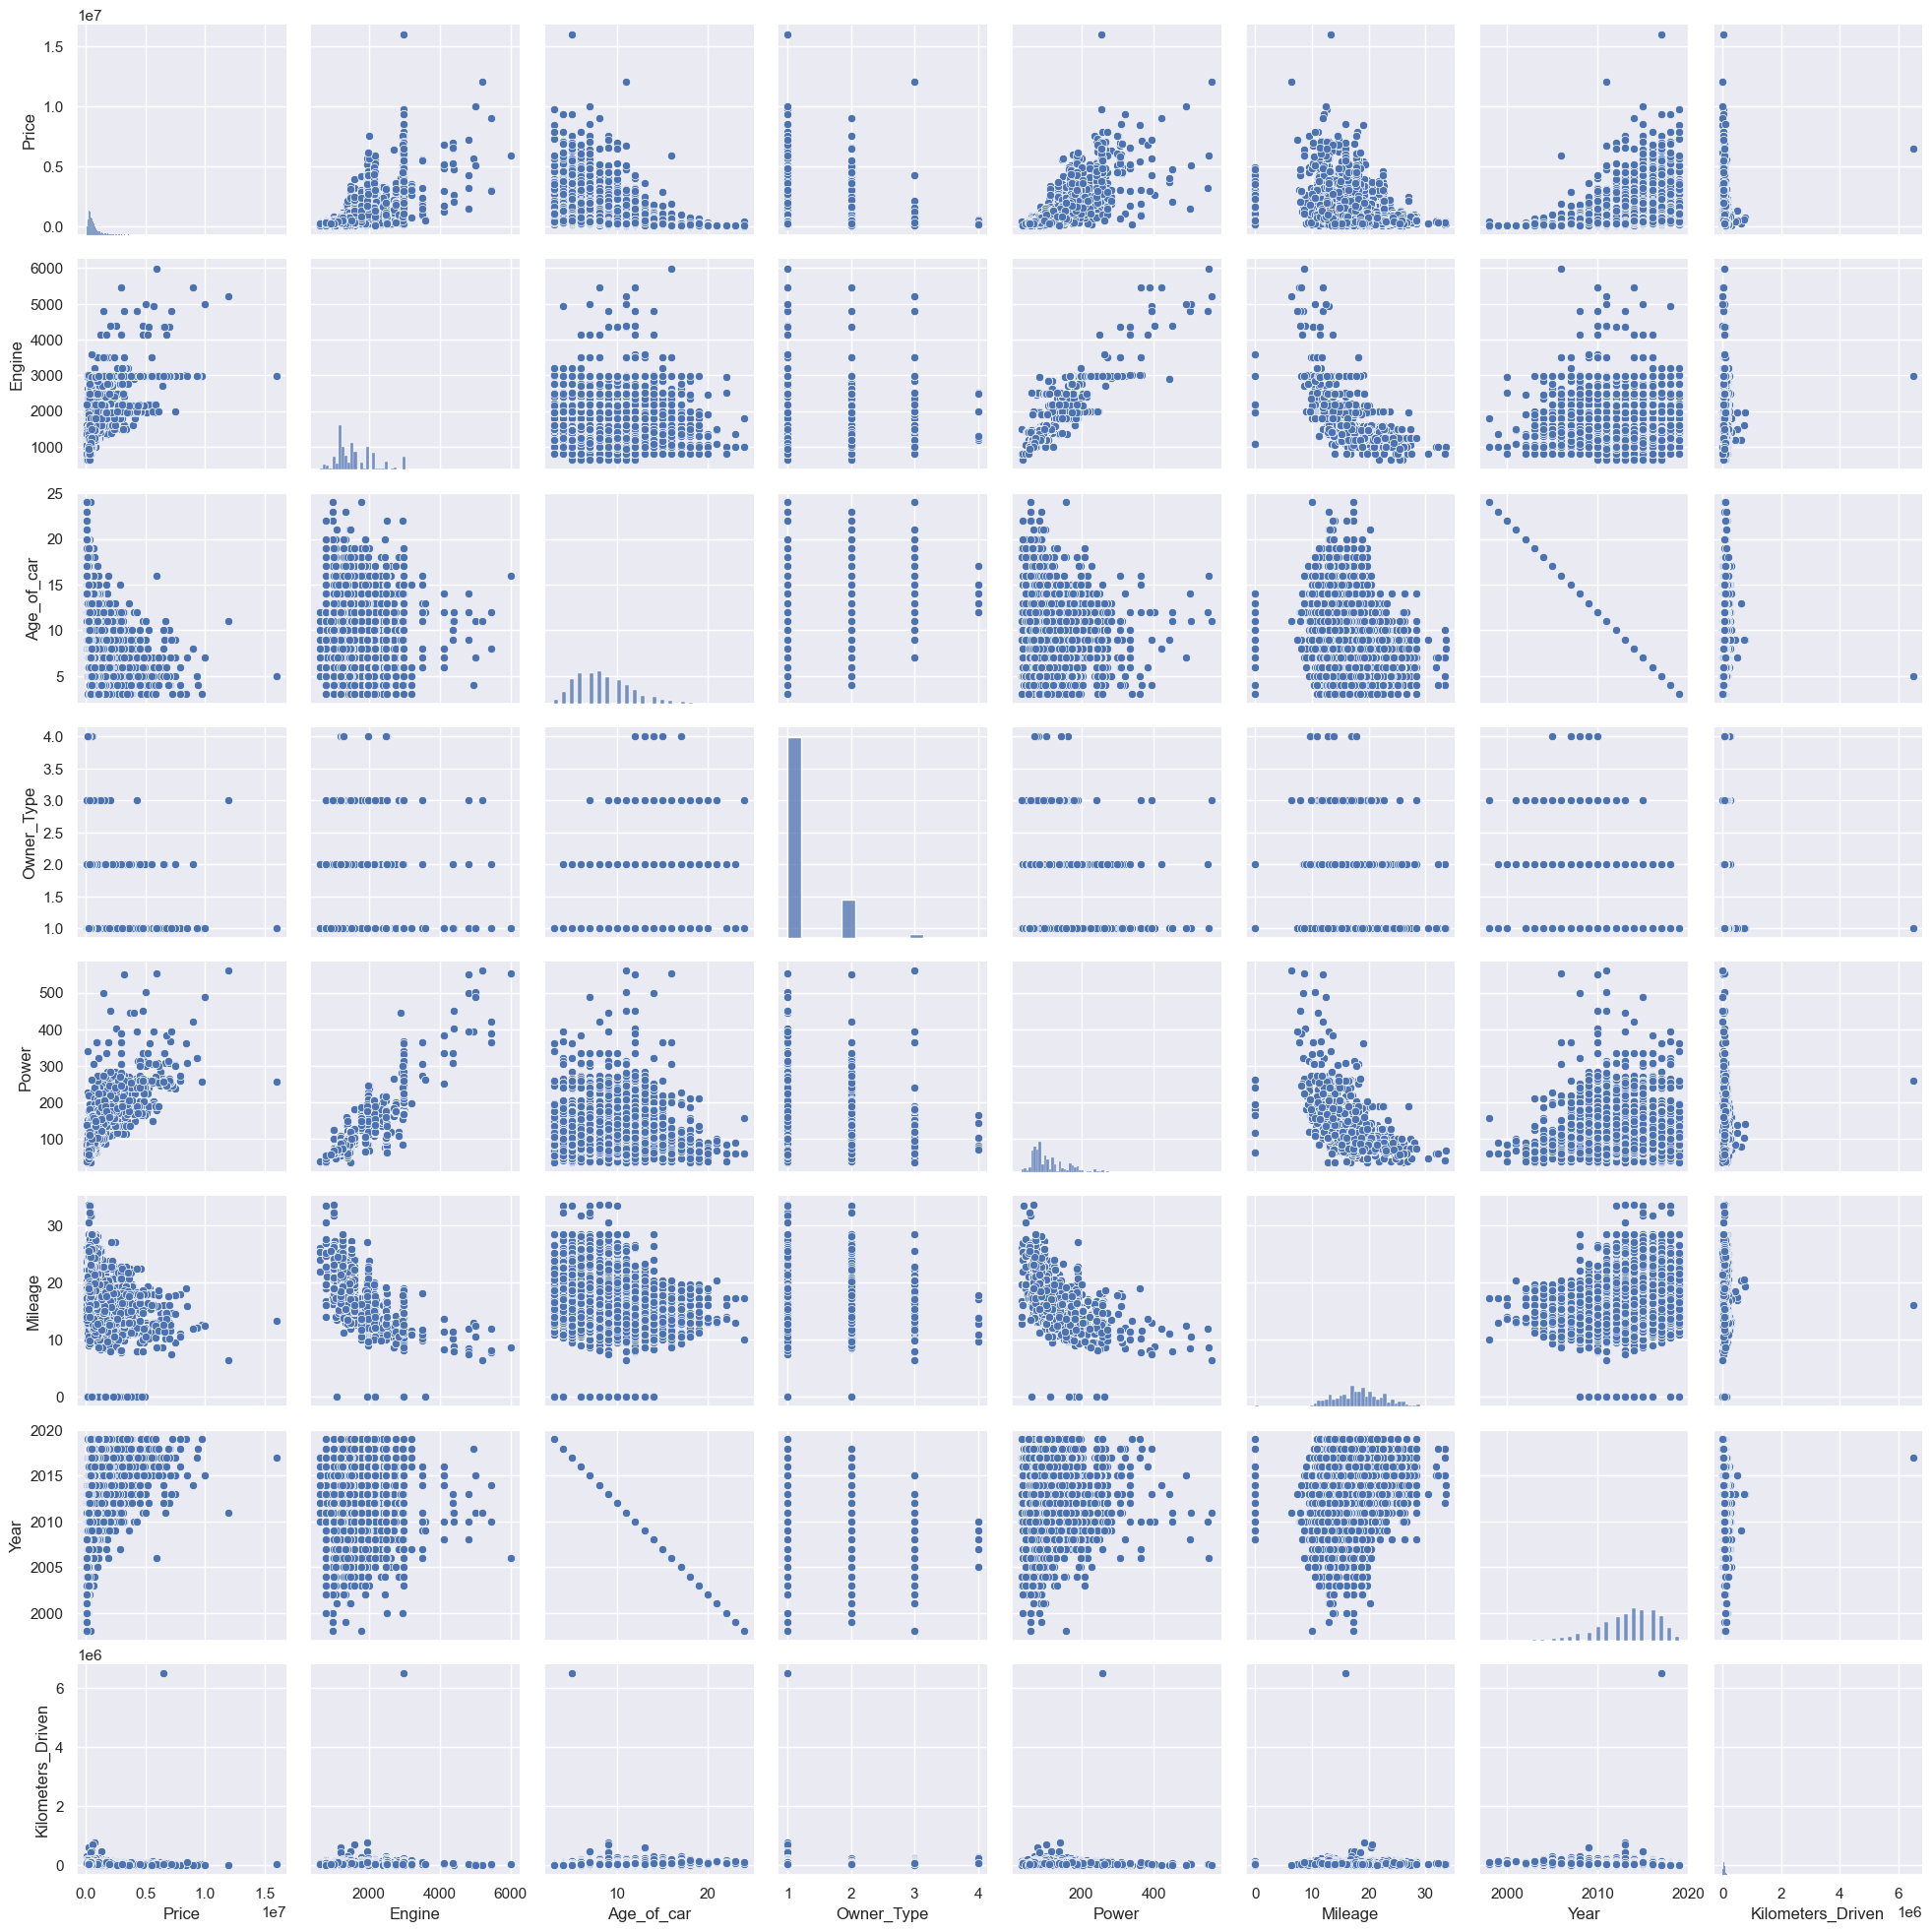

In [166]:
sns.set()
cols = ['Price', 'Engine', 'Age_of_car', 'Owner_Type', 'Power', 'Mileage', 'Year','Kilometers_Driven']
sns.pairplot(new_data[cols], size = 2.5)
plt.show()

In [167]:
new_data.sort_values(by = 'Power', ascending = False)[:10]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,3,6.40,5204.0,560.0,2.0,12000000.0,11,Lamborghini,GallardoCoupe
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,1,8.60,5998.0,552.0,4.0,5900000.0,16,Bentley,ContinentalFlying
2100,Porsche Cayenne Turbo S,Mumbai,2010,35000,Petrol,Automatic,2,11.90,4806.0,550.0,5.0,3200000.0,12,Porsche,CayenneTurbo
5088,Jaguar XJ 5.0 L V8 Supercharged,Coimbatore,2011,43686,Petrol,Automatic,1,10.50,5000.0,503.0,4.0,5066000.0,11,Jaguar,XJ5.0
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,1,8.50,4806.0,500.0,5.0,1450000.0,14,Porsche,Cayenne2009-2014
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,1,12.50,5000.0,488.1,2.0,10000000.0,7,Jaguar,FType
4821,BMW 6 Series 630i Coupe,Mumbai,2011,5900,Petrol,Automatic,1,7.94,4395.0,450.0,4.0,4750000.0,11,BMW,6Series
4627,BMW 6 Series 650i Coupe,Kochi,2010,65329,Petrol,Automatic,1,7.94,4395.0,450.0,4.0,2072000.0,12,BMW,6Series
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,1,11.05,2894.0,444.0,4.0,3700000.0,9,Audi,RS5Coupe
4061,Audi RS5 Coupe,Mumbai,2013,23312,Petrol,Automatic,1,11.05,2894.0,444.0,4.0,4050000.0,9,Audi,RS5Coupe


In [168]:
new_data = new_data.assign(ID=lambda x: x.index.values)
new_data = new_data[['ID'] + [col for col in new_data if col != 'ID']]
new_data

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,175000.0,12,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,1250000.0,7,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,450000.0,11,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,600000.0,10,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,1774000.0,9,Audi,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,28.40,1248.0,74.00,5.0,475000.0,8,Maruti,SwiftVDI
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,24.40,1120.0,71.00,5.0,400000.0,7,Hyundai,Xcent1.1
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,290000.0,10,Mahindra,XyloD4
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.90,998.0,67.10,5.0,265000.0,9,Maruti,WagonR


<AxesSubplot: xlabel='Power', ylabel='Price'>

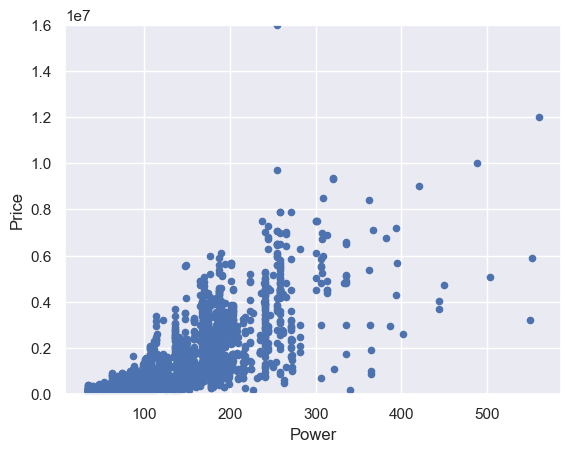

In [169]:
new_data = new_data.drop(new_data[new_data['ID'] == 70].index)
new_data = new_data.drop(new_data[new_data['ID'] == 4627].index)
data = pd.concat([new_data['Price'], new_data['Power']],axis=1)
data.plot.scatter(x = 'Power', y = 'Price', ylim=(0,16000000))

C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\2114061050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Price'], fit=norm);


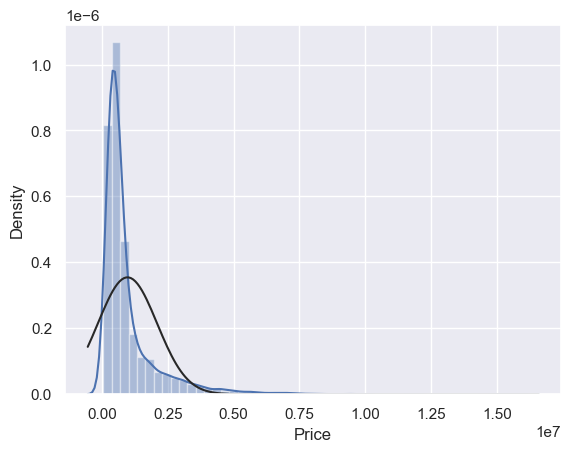

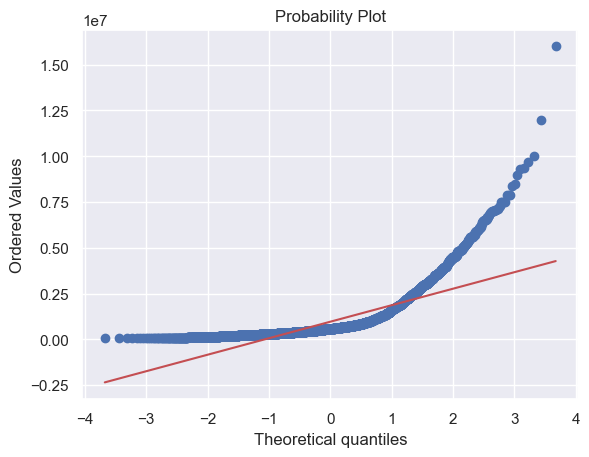

In [170]:
sns.distplot(new_data['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_data['Price'], plot=plt) 

In [171]:
new_data['Price'] = np.log(new_data['Price'])
new_data = new_data.loc[~(new_data['Price'] <= 0)]
zero_or_lower = (new_data['Price'] <= 0).sum()
print(f'There are {zero_or_lower} values that are zero or lower in the "Price" column.')
display(new_data.loc[new_data['Price'] <= 0])

There are 0 values that are zero or lower in the "Price" column.


,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model


C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\3146586288.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Price'], fit=norm)


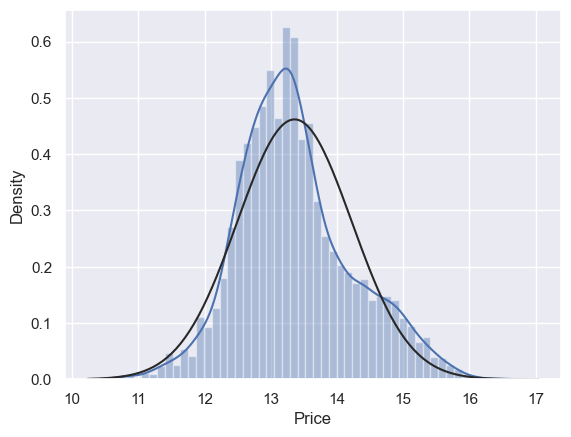

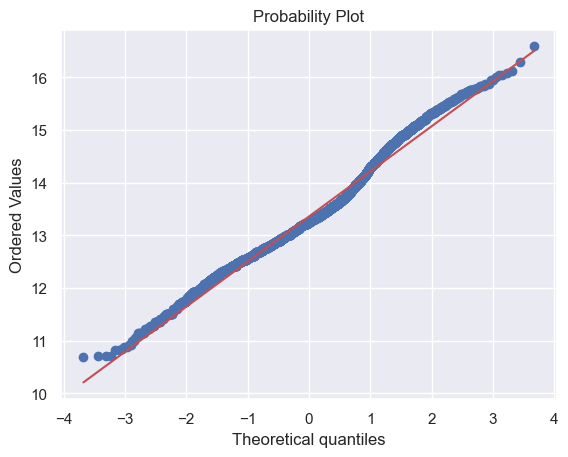

In [172]:

sns.distplot(new_data['Price'], fit=norm)
fig = plt.figure()
res = stats.probplot(new_data['Price'], plot=plt)

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model


C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\3680723851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Power'], fit=norm)


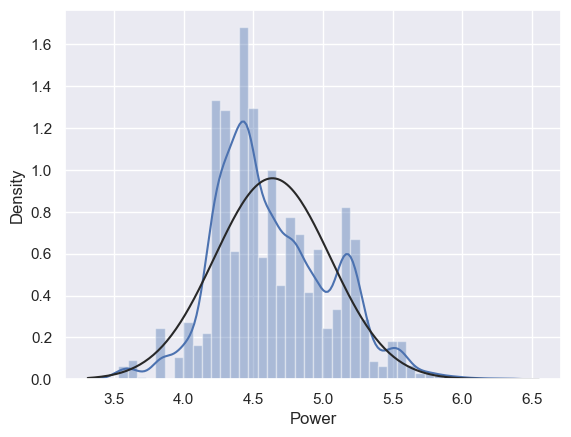

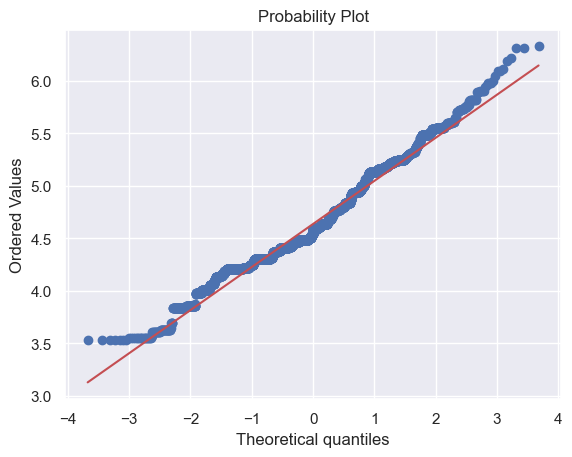

In [173]:
display(new_data.loc[new_data['Price'] < 0])
new_data['Power'] = np.log(new_data['Power'])
sns.distplot(new_data['Power'], fit=norm)
fig = plt.figure()
res = stats.probplot(new_data['Power'], plot=plt)

Text(0, 0.5, 'Price')

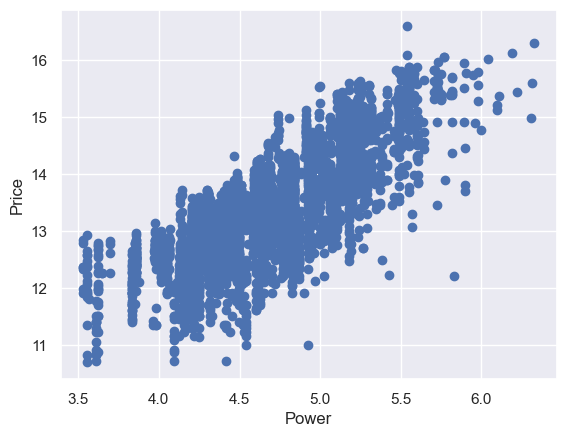

In [174]:
plt.scatter(new_data['Power'], new_data['Price'])
plt.xlabel('Power')
plt.ylabel('Price')

C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\2356370755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Mileage'], fit=norm);


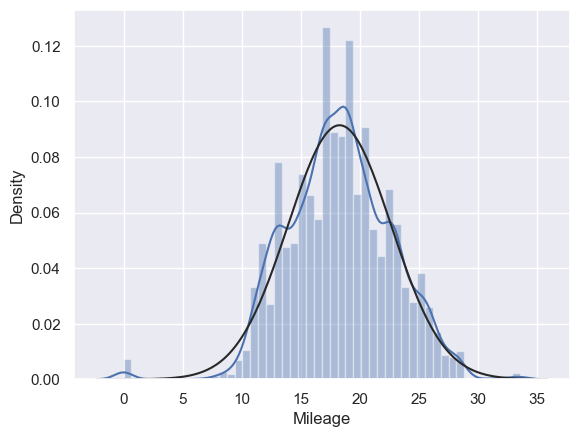

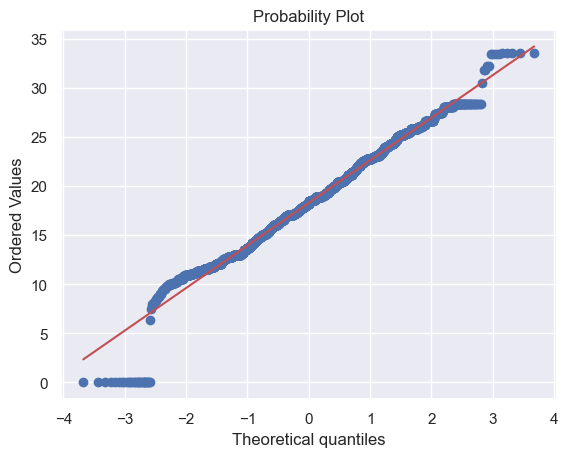

In [175]:
sns.distplot(new_data['Mileage'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_data['Mileage'], plot=plt) 

In [176]:
new_data = new_data.loc[~(new_data['Mileage'] <= 0)]
zero_or_lower = (new_data['Mileage'] <= 0).sum()
print(f'There are {zero_or_lower} values that are zero or lower in the "Price" column.')
display(new_data.loc[new_data['Mileage'] <= 0])

There are 0 values that are zero or lower in the "Price" column.


,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model


Text(0, 0.5, 'Price')

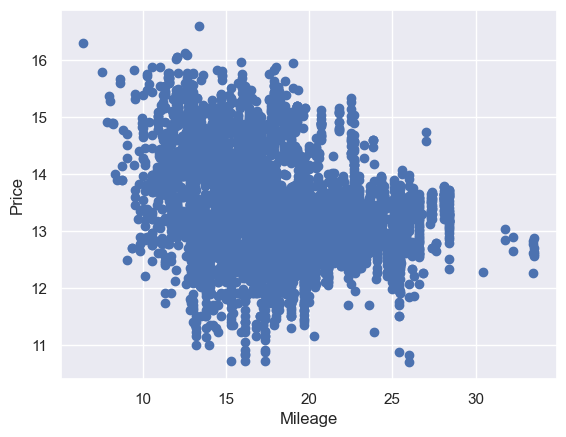

In [177]:
plt.scatter(new_data['Mileage'], new_data['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model


C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\4230545366.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Mileage'], fit=norm)


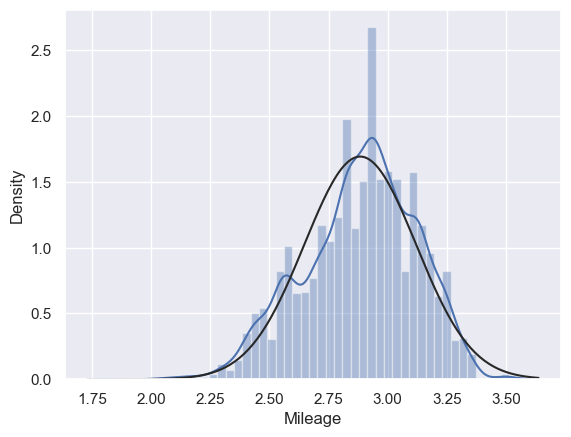

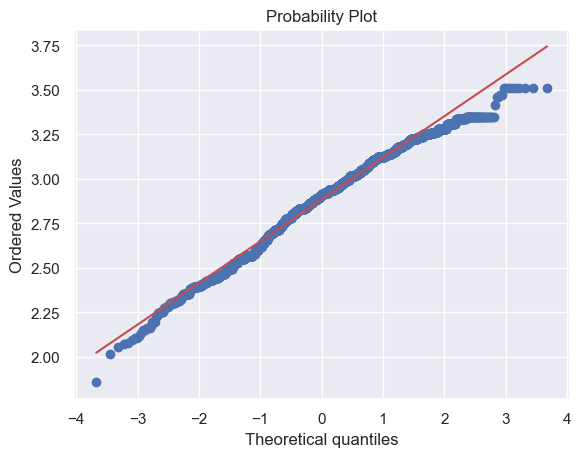

In [184]:
display(new_data.loc[new_data['Price'] < 0])
new_data['Mileage'] = np.log(new_data['Mileage'])
sns.distplot(new_data['Mileage'], fit=norm)
fig = plt.figure()
res = stats.probplot(new_data['Mileage'], plot=plt)

Text(0, 0.5, 'Price')

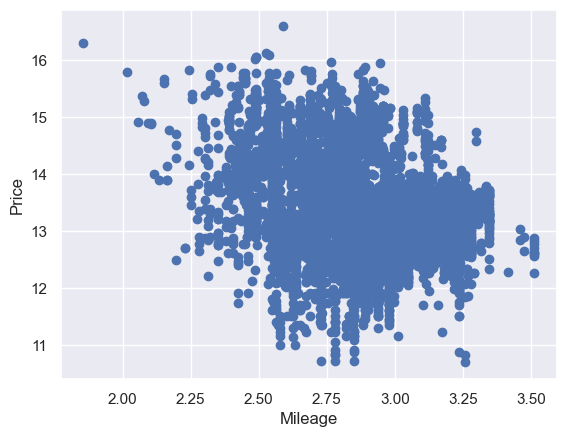

In [185]:
plt.scatter(new_data['Mileage'], new_data['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\4211118065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Kilometers_Driven'], fit=norm);


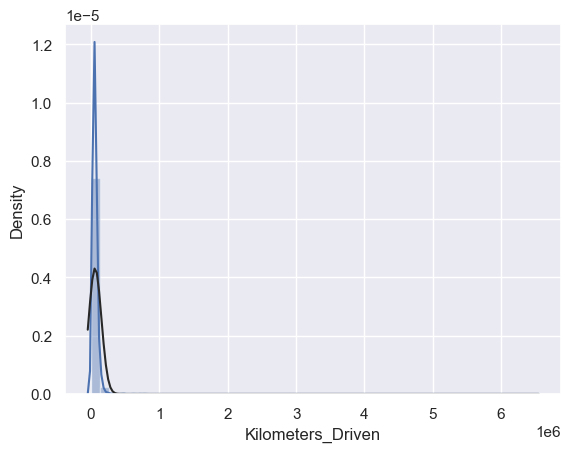

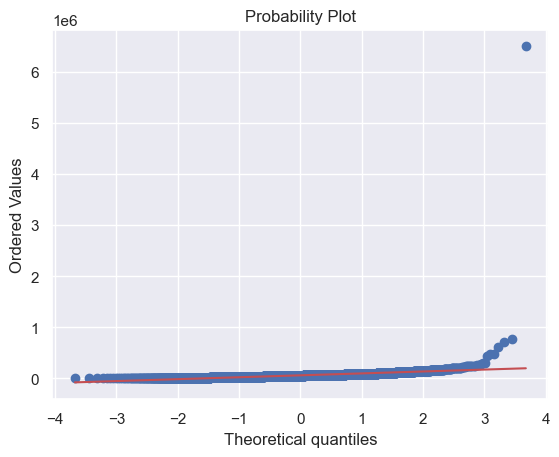

In [178]:
sns.distplot(new_data['Kilometers_Driven'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_data['Kilometers_Driven'], plot=plt) 

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model


C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\1438098403.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Kilometers_Driven'], fit=norm)


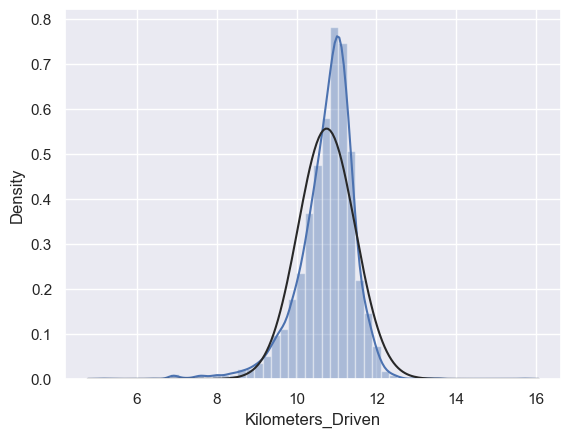

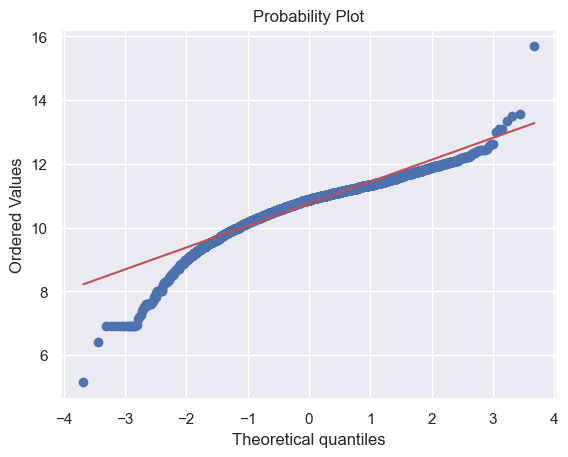

In [179]:
display(new_data.loc[new_data['Price'] < 0])
new_data['Kilometers_Driven'] = np.log(new_data['Kilometers_Driven'])
sns.distplot(new_data['Kilometers_Driven'], fit=norm)
fig = plt.figure()
res = stats.probplot(new_data['Kilometers_Driven'], plot=plt)

Text(0, 0.5, 'Price')

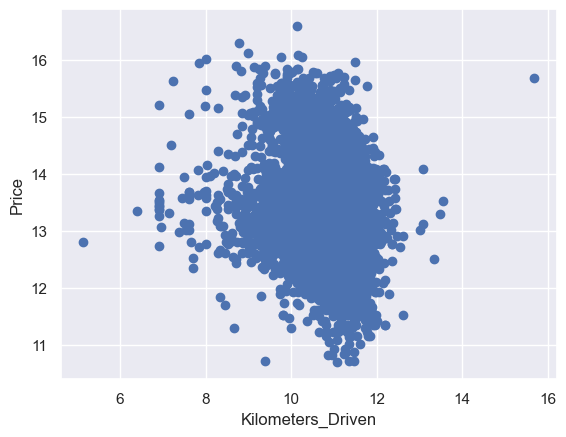

In [180]:
plt.scatter(new_data['Kilometers_Driven'], new_data['Price'])
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')

C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\1250404609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Age_of_car'], fit=norm);


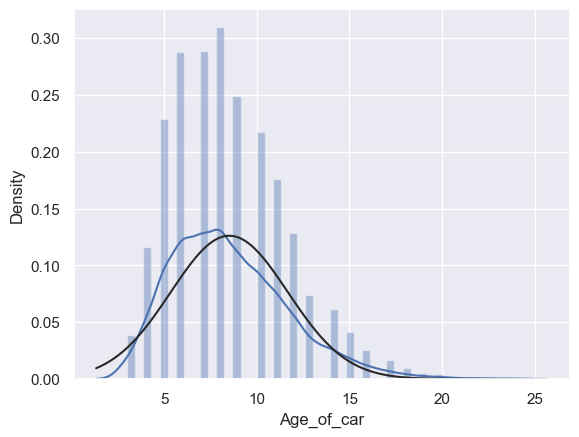

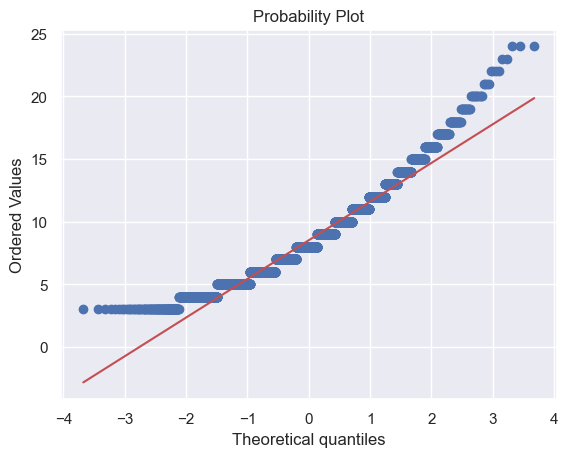

In [181]:
sns.distplot(new_data['Age_of_car'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_data['Age_of_car'], plot=plt) 

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Company,Model


C:\Users\sherwin\AppData\Local\Temp\ipykernel_11476\2827119768.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Age_of_car'], fit=norm)


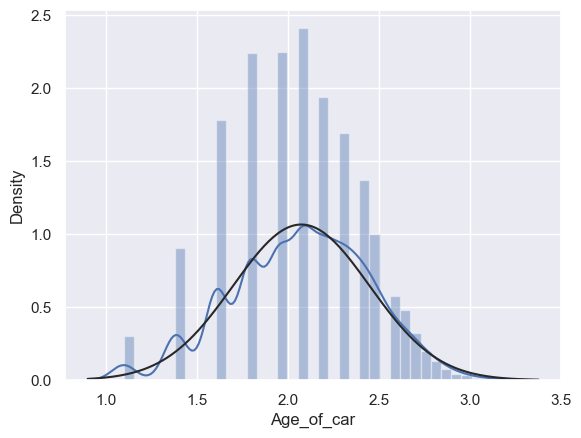

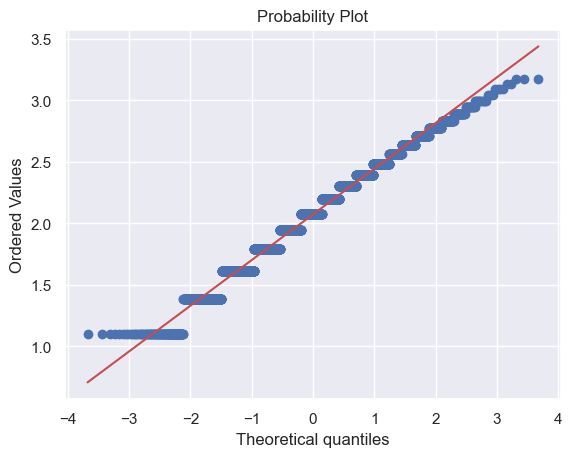

In [182]:
display(new_data.loc[new_data['Price'] < 0])
new_data['Age_of_car'] = np.log(new_data['Age_of_car'])
sns.distplot(new_data['Age_of_car'], fit=norm)
fig = plt.figure()
res = stats.probplot(new_data['Age_of_car'], plot=plt)

Text(0, 0.5, 'Price')

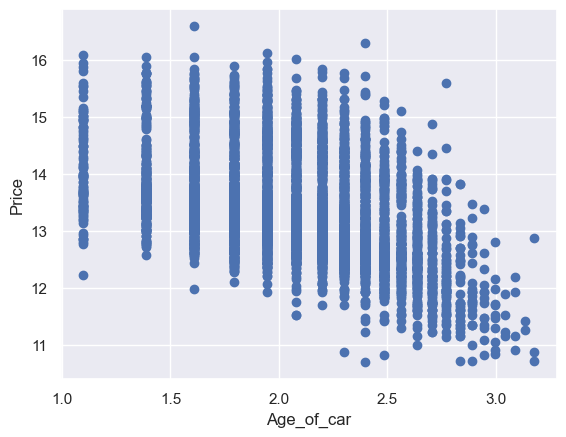

In [183]:
plt.scatter(new_data['Age_of_car'], new_data['Price'])
plt.xlabel('Age_of_car')
plt.ylabel('Price')